In [49]:
# !wget -nc https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv -O ../temp/data/scaler_clustering.csv

In [50]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
csv_path = '../temp/data/scaler_clustering.csv'
df_raw = pd.read_csv(csv_path, index_col=0)

df_raw.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## 1. Problem Statement & EDA
### 1.1 Problem
To cluster segment of learners at scaler on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### 1.2 Shape of data
Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

#### 1.2.1 Observations on shape of data

In [52]:
df_raw.shape

(205843, 6)

#### 1.2.2 Data types of all the attributes

In [53]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


#### 1.2.3 Conversion of categorical attributes to 'category' (If required)

In [42]:
df_raw = df_raw.convert_dtypes()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205799 non-null  string
 1   email_hash        205843 non-null  string
 2   orgyear           205757 non-null  Int64 
 3   ctc               205843 non-null  Int64 
 4   job_position      153279 non-null  string
 5   ctc_updated_year  205843 non-null  Int64 
dtypes: Int64(3), string(3)
memory usage: 11.6 MB


In [43]:
pd.DataFrame({col: {'number of unique values -->':df_raw[col].nunique()} for col in df_raw.columns[2:]})

,orgyear,ctc,job_position,ctc_updated_year
number of unique values -->,77,3360,1016,7


* CTC is the only numerical variable

#### 1.2.4 Missing value detection, statistical summary.

In [44]:
df_raw.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [45]:
df_raw.describe()

,orgyear,ctc,ctc_updated_year
count,205757.0,205843.0,205843.0
mean,2014.88275,2271685.041993,2019.628231
std,63.571115,11800914.440025,1.325104
min,0.0,2.0,2015.0
25%,2013.0,530000.0,2019.0
50%,2016.0,950000.0,2020.0
75%,2018.0,1700000.0,2021.0
max,20165.0,1000150000.0,2021.0


### 1.3 Univariate Analysis

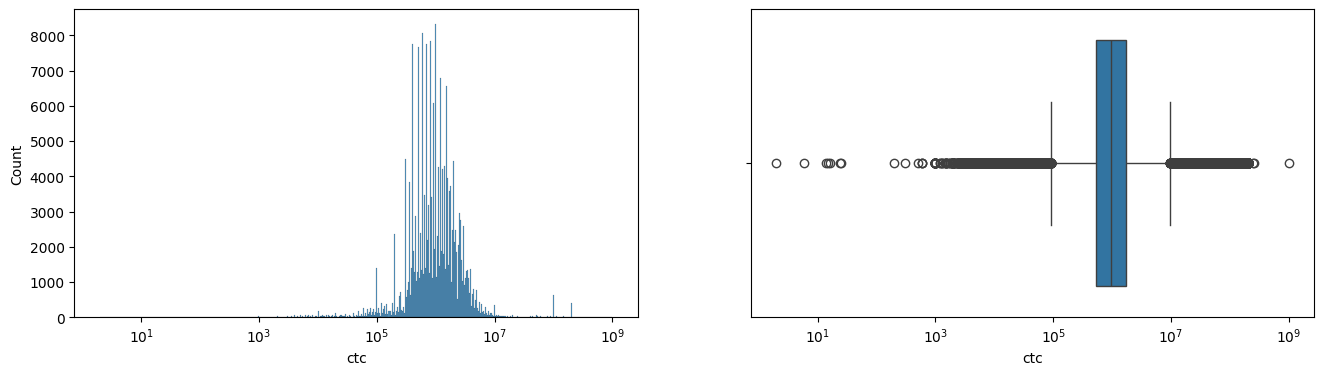

In [46]:
def distnbox(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.histplot(data=df, x=col, ax=axes[0], log_scale=True)
    sns.boxplot(data=df, x=col, ax=axes[1], log_scale=True)

distnbox(df_raw, 'ctc')

<Axes: xlabel='ctc_updated_year', ylabel='count'>

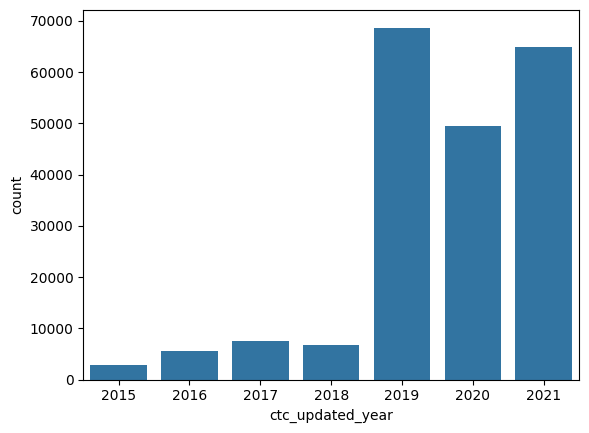

In [47]:
sns.countplot(df_raw, x='ctc_updated_year')

#### 1.3.1 Emails
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary.

### 1.4 Bivariate Analysis 

# 2. Data Preprocessing

## 2.1 Feature engineering
Checking for duplicates in the dataset and drop them

In [48]:
# df_dropped = df_raw[~df_drop_idx].convert_dtypes()
df_dropped = df_raw.drop_duplicates()

# number of rows dropped
len(df_raw) - len(df_dropped)

34

In [64]:
print(sum((df_dropped['orgyear']==0).dropna())) # drop 17 rows where orgyear is 0
df_dropped = df_dropped[~(df_dropped['orgyear']==0)]

17


## 2.2 Imputation
Mean/ KNN Imputation, Regex for cleaning company names, Standardization & Encoding
### 2.2.1 Clean company names

### 2.2.2 Prepare data from Imputation
#### 2.2.2.1 Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [18]:
df_non_pii = df_dropped.iloc[:,[2, 3, 5]].copy() # first 2 columns are PII data

df_non_pii.loc[:, 'job_position'] = enc.fit_transform(df_dropped['job_position'].fillna('NA'))
df_non_pii.head()

,orgyear,ctc,ctc_updated_year,job_position
0,2016,1100000,2020,458
1,2018,449999,2019,292
2,2015,2000000,2020,140
3,2017,700000,2019,140
4,2017,1400000,2019,292


#### 2.2.2.2 Standardization

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X = df_non_pii)
X_scaled

array([[9.95553360e-01, 1.09883627e-03, 8.33333333e-01, 4.50787402e-01],
       [9.96541502e-01, 4.48932109e-04, 6.66666667e-01, 2.87401575e-01],
       [9.95059289e-01, 1.99870219e-03, 8.33333333e-01, 1.37795276e-01],
       ...,
       [9.98023715e-01, 6.98895865e-04, 1.00000000e+00, 4.24212598e-01],
       [9.97035573e-01, 5.09824036e-03, 6.66666667e-01, 4.24212598e-01],
       [9.94565217e-01, 1.23881542e-03, 1.66666667e-01, 4.24212598e-01]])

### 2.2.3 kNN Imputation

In [20]:
from sklearn.impute import KNNImputer
imp = KNNImputer()

X_imp = imp.fit_transform(X_scaled)

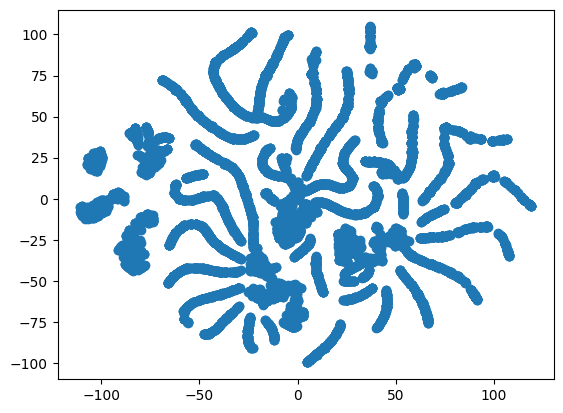

In [22]:
SAMPLE_SIZE = 10000
X_smpl = pd.DataFrame(X_imp[:, :-1]).sample(SAMPLE_SIZE).to_numpy()

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_emb = tsne.fit_transform(X_smpl)

import matplotlib.pyplot as plt
plt.scatter(x=X_emb[:, 0], y=X_emb[:,1])